In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import re
from shapely.geometry import Point
import folium
from folium.plugins import MarkerCluster
import geoplot as gplt
import geoplot.crs as gcrs

In [2]:
# Bring in Census Tract shapefile
path = 'data/county/tl_2021_47_tract/tl_2021_47_tract.shp'
tiger_df = gpd.read_file(path)
tiger_df = tiger_df.to_crs("EPSG:4326")

# Grab county Davidson FIPS 037
davidson_gdf = tiger_df.loc[(tiger_df.COUNTYFP == '037')]
davidson_gdf['TRACTCE'] = davidson_gdf['TRACTCE'].astype(str)
davidson_gdf['TRACTCE'] = '37' + davidson_gdf['TRACTCE']
davidson_gdf['TRACTCE'] = davidson_gdf['TRACTCE'].astype(int)

/home/nhac/anaconda3/envs/py-geo/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [3]:
davidson_gdf = davidson_gdf.rename(columns={'TRACTCE':'tract'})

In [4]:
davidson_gdf.tract

37      37013202
38      37013201
39      37018409
40      37018410
42      37015804
          ...   
1674    37017500
1675    37015613
1682    37010301
1683    37010802
1684    37010904
Name: tract, Length: 174, dtype: int64

In [5]:
homes = pd.read_csv('props_2.csv')

In [6]:
del homes['Unnamed: 0']

In [7]:
homes

,apn,tract
0,00100000100,37010103.0
1,00100000200,37010103.0
2,00100000300,37010103.0
3,00200004700,37010202.0
4,00200004900,37010202.0
...,...,...
273308,188100J20400CO,37019114.0
273309,188100J90000CO,37019114.0
273310,19000000200,37019114.0
273311,19000000400,37019114.0


In [8]:
locations_2022 = pd.read_csv('/home/nhac/Documents/NSS/Python/data/homes_2022.csv')

In [9]:
locations_2022

,Unnamed: 0,apn,pin,ownername,ownerdate,ownerdocument,ownerdocumenthref,owneraddress,ownercountry,saleamount,status,year_sold,total_sales,ludesc,geometry,centroid,longitude,latitude,category
0,0,00200002700,141,"BOSTICK, JENNIFFER I & TRAYMAINE V",2022-08-12,DB-20220815 0092531,DB-20220815 0092531~https://www.davidsonportal...,"112 A KING ST, GREENBRIER TN 37073",US,440000,Current,2022.0,4,SINGLE FAMILY,"((-86.7627237712887,36.39387621844443),(-86.76...","['-86.76308736156855', '36.39356184510311']",-86.763087,36.393562,new
1,1,00300006100,278,"ZIMMERMAN, AUTUMN RAIN & LUKE DOUGLAS",2022-01-05,DB-20220112 0004387,DB-20220112 0004387~https://www.davidsonportal...,"2505 TINNIN RD, GOODLETTSVILLE TN 37072",US,425000,Current,2022.0,3,SINGLE FAMILY,"((-86.74428896078742,36.39726799066107),(-86.7...","['-86.74626973754272', '36.39613320338797']",-86.746270,36.396133,new
2,2,00700004800,1190,"PURPLE DOORS, LLC",2022-06-17,DB-20220628 0074136,DB-20220628 0074136~https://www.davidsonportal...,"1043 DEER HARBOUR RD, BRISTOL TN 37620",US,185000,Current,2022.0,3,SINGLE FAMILY,"((-86.74137936046365,36.37090081327383),(-86.7...","['-86.74161824214296', '36.37157134591021']",-86.741618,36.371571,new
3,3,00700009700,1362,"COBB, BILLY & RUBY",2022-10-19,DB-20221020 0114372,DB-20221020 0114372~https://www.davidsonportal...,"8342 OLD SPRINGFIELD PIKE, GOODLETTSVILLE TN ...",US,360000,Current,2022.0,2,SINGLE FAMILY,"((-86.74520276747884,36.37323152892935),(-86.7...","['-86.74549492856568', '36.373173678808186']",-86.745495,36.373174,new
4,4,00700014400,1428,"BRADSHAW CAPITAL, LLC",2022-01-31,DB-20220224 0020784,DB-20220224 0020784~https://www.davidsonportal...,"1849 FOX CHASE DR, GOODLETTSVILLE TN 37072",US,591500,Current,2022.0,3,SINGLE FAMILY,"((-86.74027435007,36.378621511726045),(-86.740...","['-86.74133334520889', '36.378655805968755']",-86.741333,36.378656,new
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10893,10893,04115002900,22453,"RANGEL, LUIS MIGUEL MARTINEZ & MARTINEZ, HILDA...",2022-08-19,DB-20220823 0094917,DB-20220823 0094917~https://www.davidsonportal...,"1220 WESTCHESTER DR, BRENTWOOD TN 37027",US,305000,Current,2022.0,2,SINGLE FAMILY,"((-86.76523590544183,36.26223528605726),(-86.7...","['-86.76518167453519', '36.26262380288848']",-86.765182,36.262624,new
10894,10894,082140A04300CO,311125,"BARRETT, SCOTT & LINEBACH, NOELLE BARRETT",2022-02-08,DB-20220218 0019258,DB-20220218 0019258~https://www.davidsonportal...,"3704 WOODMONT BLVD, NASHVILLE TN 37215",US,615000,Historical,2022.0,3,RESIDENTIAL CONDO,"((-86.78084759176656,36.17407320687664),(-86.7...","['-86.78093697848583', '36.17407200344954']",-86.780937,36.174072,old
10895,10895,082140A04600CO,311128,"RUGG, COLLIN CUMMINGS",2022-05-09,DB-20220519 0057830,DB-20220519 0057830~https://www.davidsonportal...,"714 LIDO CT, SAN DIEGO CA 92109",US,620000,Current,2022.0,2,RESIDENTIAL CONDO,"((-86.78098186188743,36.17418606640543),(-86.7...","['-86.78102195766598', '36.174211497047594']",-86.781022,36.174211,new
10896,10896,082140A04700CO,311129,"ANDERSON, ZEKE",2022-06-17,DB-20220624 0072681,DB-20220624 0072681~https://www.davidsonportal...,"2103 OAKWOOD AVE, NASHVILLE TN 37207",US,630000,Historical,2022.0,3,RESIDENTIAL CONDO,"((-86.78096741667383,36.17426774796863),(-86.7...","['-86.78105695225803', '36.17426649725944']",-86.781057,36.174266,old


In [10]:
locations_2022['saleamount'].mean()

593299.943842907

In [11]:
averageish = locations_2022.loc[(locations_2022['saleamount'] >= 493000) & (locations_2022['saleamount'] <= 693000)]

In [12]:
del locations_2022['Unnamed: 0']

In [13]:
locations_2022 = locations_2022[['apn','saleamount','longitude','latitude']]

In [14]:
locations_2022

,apn,saleamount,longitude,latitude
0,00200002700,440000,-86.763087,36.393562
1,00300006100,425000,-86.746270,36.396133
2,00700004800,185000,-86.741618,36.371571
3,00700009700,360000,-86.745495,36.373174
4,00700014400,591500,-86.741333,36.378656
...,...,...,...,...
10893,04115002900,305000,-86.765182,36.262624
10894,082140A04300CO,615000,-86.780937,36.174072
10895,082140A04600CO,620000,-86.781022,36.174211
10896,082140A04700CO,630000,-86.781057,36.174266


In [15]:
# Merge tables on apn to get tracts and apns etc.
gdf = pd.merge(left=averageish, right=homes, on='apn')

In [16]:
locations_2022

,apn,saleamount,longitude,latitude
0,00200002700,440000,-86.763087,36.393562
1,00300006100,425000,-86.746270,36.396133
2,00700004800,185000,-86.741618,36.371571
3,00700009700,360000,-86.745495,36.373174
4,00700014400,591500,-86.741333,36.378656
...,...,...,...,...
10893,04115002900,305000,-86.765182,36.262624
10894,082140A04300CO,615000,-86.780937,36.174072
10895,082140A04600CO,620000,-86.781022,36.174211
10896,082140A04700CO,630000,-86.781057,36.174266


In [34]:
groupie = pd.merge(left=locations_2022, right=homes, on='apn')

#join_gdf = pd.merge(left=davidson_gdf, right=groupie, on='tract_number')

In [35]:
groupie

,apn,saleamount,longitude,latitude,tract
0,00200002700,440000,-86.763087,36.393562,37010202.0
1,00300006100,425000,-86.746270,36.396133,37010202.0
2,00700004800,185000,-86.741618,36.371571,37010202.0
3,00700009700,360000,-86.745495,36.373174,37010202.0
4,00700014400,591500,-86.741333,36.378656,37010202.0
...,...,...,...,...,...
10893,04115002900,305000,-86.765182,36.262624,37010901.0
10894,082140A04300CO,615000,-86.780937,36.174072,37019400.0
10895,082140A04600CO,620000,-86.781022,36.174211,37019400.0
10896,082140A04700CO,630000,-86.781057,36.174266,37019400.0


In [36]:
groupie_locations = groupie[['longitude','latitude','tract']]

In [37]:
groupie.tract = groupie.tract.astype(str)

In [38]:
groupie_med = groupie.groupby('tract')['saleamount'].mean()

In [39]:
groupie_med


tract
37010103.0       452590.000000
37010104.0       416185.882353
37010105.0       374669.000000
37010106.0       360412.171598
37010201.0       388246.153846
                     ...      
37019400.0       739208.895105
37019500.0       844803.585052
37019600.0       381902.272727
40734018407.0    522500.000000
47037018407.0    560000.000000
Name: saleamount, Length: 159, dtype: float64

In [40]:
groupie_med = groupie_med.to_frame()

In [41]:
groupie_med = groupie_med.reset_index()

In [31]:
groupie.tract = groupie.tract.astype(str)

In [42]:
groupie.dtypes

apn            object
saleamount      int64
longitude     float64
latitude      float64
tract          object
dtype: object

In [ ]:
groupie_med.dtypes

In [ ]:
groupie_med = groupie_med.reset_index()

In [ ]:
groupie_med

In [43]:
for i, rows in groupie_med.iterrows():
    groupie_med.loc[i,'jointract'] = rows.tract[0:-2]

In [46]:
davidson_gdf.tract = davidson_gdf.tract.astype(str)

In [44]:
groupie_med

,tract,saleamount,jointract
0,37010103.0,452590.000000,37010103
1,37010104.0,416185.882353,37010104
2,37010105.0,374669.000000,37010105
3,37010106.0,360412.171598,37010106
4,37010201.0,388246.153846,37010201
...,...,...,...
154,37019400.0,739208.895105,37019400
155,37019500.0,844803.585052,37019500
156,37019600.0,381902.272727,37019600
157,40734018407.0,522500.000000,40734018407


In [53]:
fml = pd.merge(left=groupie_med, right=davidson_gdf,  how= "inner", left_on='jointract', right_on='tract')

In [54]:
fml

,tract_x,saleamount,jointract,STATEFP,COUNTYFP,tract_y,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,37010103.0,4.525900e+05,37010103,47,037,37010103,47037010103,101.03,Census Tract 101.03,G5020,S,48020412,61097,+36.3444054,-086.8608396,"POLYGON ((-86.91752 36.33976, -86.91747 36.339..."
1,37010104.0,4.161859e+05,37010104,47,037,37010104,47037010104,101.04,Census Tract 101.04,G5020,S,65057849,251504,+36.2940028,-086.8777483,"POLYGON ((-86.97440 36.24991, -86.97244 36.252..."
2,37010105.0,3.746690e+05,37010105,47,037,37010105,47037010105,101.05,Census Tract 101.05,G5020,S,28328799,1093,+36.2504208,-086.8521501,"POLYGON ((-86.89144 36.26205, -86.89100 36.262..."
3,37010106.0,3.604122e+05,37010106,47,037,37010106,47037010106,101.06,Census Tract 101.06,G5020,S,21616474,6845,+36.2610013,-086.8023491,"POLYGON ((-86.83089 36.26570, -86.83016 36.265..."
4,37010201.0,3.882462e+05,37010201,47,037,37010201,47037010201,102.01,Census Tract 102.01,G5020,S,23718545,0,+36.2882537,-086.7728157,"POLYGON ((-86.81736 36.27398, -86.81733 36.274..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,37019117.0,4.252101e+05,37019117,47,037,37019117,47037019117,191.17,Census Tract 191.17,G5020,S,12972892,0,+36.0192025,-086.6464226,"POLYGON ((-86.66950 36.03067, -86.66919 36.030..."
136,37019118.0,3.710092e+05,37019118,47,037,37019118,47037019118,191.18,Census Tract 191.18,G5020,S,2026269,0,+36.0382898,-086.6692376,"POLYGON ((-86.67789 36.04066, -86.67788 36.040..."
137,37019200.0,7.706550e+05,37019200,47,037,37019200,47037019200,192,Census Tract 192,G5020,S,1771200,0,+36.1711529,-086.7520191,"POLYGON ((-86.76277 36.17259, -86.76250 36.172..."
138,37019300.0,1.222500e+06,37019300,47,037,37019300,47037019300,193,Census Tract 193,G5020,S,3498932,493345,+36.1710458,-086.7683581,"POLYGON ((-86.78295 36.19177, -86.78274 36.191..."


In [49]:
#fml.to_csv('fml.csv')

In [ ]:
#groupie['point'] = groupie.apply(lambda x: Point((float(x.longitude), 
#                                          float(x.latitude))), 
#                                        axis=1)
#gdf.head(3)

In [ ]:
# extract coordinates from long and lat and convert to Point-type and create column 'point'
#fml['point'] = fml.apply(lambda x: Point((float(x.longitude), 
#                                          float(x.latitude))), 
#                                        axis=1)
#fml.head(3)

In [ ]:
type(gdf)

In [55]:
# Convert gdf to GeoDataFrame
fml = gpd.GeoDataFrame(fml,
                      crs = tiger_df.crs,
                      geometry = fml['geometry'])

<GeoAxesSubplot: >

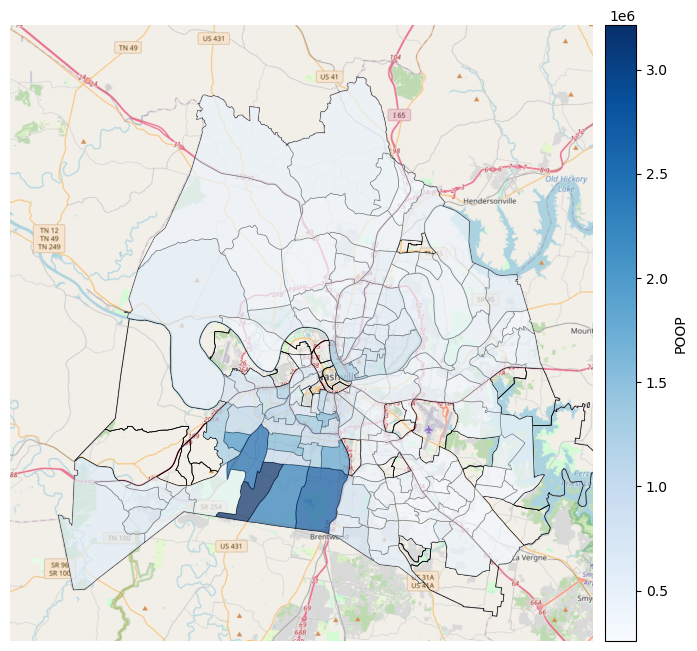

In [56]:
ax = gplt.webmap(fml,
                 figsize=(16, 8),
                 projection=gcrs.WebMercator())

gplt.polyplot(davidson_gdf, 
              linewidth=0.5,
              ax=ax
    )


gplt.choropleth(
    fml, 
    hue='saleamount',
    legend=True,
    legend_kwargs={'anchor': (0.0,0.0), 'pad':0.01, 'label':'POOP'},
    cmap='Blues', 
    alpha=0.7, 
    projection=gcrs.AlbersEqualArea(), 
    ax = ax
)

In [ ]:
type(gdf)

In [ ]:
groupie_map = folium.Map(location= (36.174465, -86.767960), zoom_start= 12, tiles="openstreetmap")
mrk_cluster = MarkerCluster().add_to(groupie_map)
folium.GeoJson(davidson_loc).add_to(groupie_map)

In [ ]:
for i, row in averageish.iterrows():
    loc= [row['latitude'], row['longitude']]
    pop= str(row['saleamount'])
    icon=folium.Icon(color='purple',icon='house',prefix='fa')
    
    marker = folium.Marker(
        location = loc,
        popup = pop,
    icon = icon)
    
    marker.add_to(mrk_cluster)

In [ ]:
#map